In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_train = "/content/drive/MyDrive/train"

In [4]:
# данные по дислокации
dislok = pd.read_parquet(path_train + '/dislok_wagons.parquet').convert_dtypes()
# данные по текущим ремонтам
pr_rem = pd.read_parquet(path_train + '/pr_rems.parquet').convert_dtypes()
# список вагонов с остаточным пробегом на момент прогноза
wag_prob = pd.read_parquet(path_train + '/wagons_probeg_ownersip.parquet').convert_dtypes()
 # параметры вагона
wag_param = pd.read_parquet(path_train + '/wag_params.parquet').convert_dtypes()
# таргет по прогноза выбытия вагонов в ПР на месяц и на 10 дней
target = pd.read_csv(path_train +'/target/y_train.csv').convert_dtypes()
 # текущие ремонты вагонов
tr_rem = pd.read_parquet(path_train + '/tr_rems.parquet').convert_dtypes()
# кти
kti = pd.read_parquet(path_train + '/kti_izm.parquet').convert_dtypes()

### Data info

In [5]:
dislok.head()

,plan_date,wagnum,date_kap,date_dep,kod_vrab,date_pl_rem,id_road_disl,st_id_dest,id_road_dest,st_id_send,id_road_send,ost_prob,isload,fr_id,last_fr_id,distance
0,2022-08-01,1071,NaT,2020-02-16,0,2023-02-16,42,22,42,11470,42,36899,0,5032,1413,-1
1,2022-08-02,1071,NaT,2020-02-16,0,2023-02-16,42,11663,0,11470,42,36899,1,1204,1204,998
2,2022-08-03,1071,NaT,2020-02-16,0,2023-02-16,42,11663,0,11470,42,36711,1,1204,1204,989
3,2022-08-04,1071,NaT,2020-02-16,0,2023-02-16,42,11663,0,11470,42,36711,1,1204,1204,939
4,2022-08-05,1071,NaT,2020-02-16,0,2023-02-16,42,11663,0,11470,42,36711,1,1204,1204,963


In [6]:
dislok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250933 entries, 0 to 1052924
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   plan_date     datetime64[ns]
 1   wagnum        Int64         
 2   date_kap      datetime64[ns]
 3   date_dep      datetime64[ns]
 4   kod_vrab      Int64         
 5   date_pl_rem   datetime64[ns]
 6   id_road_disl  Int64         
 7   st_id_dest    Int64         
 8   id_road_dest  Int64         
 9   st_id_send    Int64         
 10  id_road_send  Int64         
 11  ost_prob      Int64         
 12  isload        Int64         
 13  fr_id         Int64         
 14  last_fr_id    Int64         
 15  distance      Int64         
dtypes: Int64(12), datetime64[ns](4)
memory usage: 882.3 MB


In [7]:
pr_rem.head()

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month
0,15000,2022-08-05,1,12-132,3,3,0,493,493,37,8
2,25485,2022-08-21,1,12-132-03,13,13,0,6152,4793,360,8
3,25944,2022-08-09,1,12-132-03,13,13,1,6152,4793,322,8
4,24080,2022-08-13,1,12-296-01,13,13,0,6152,4793,308,8
5,28612,2022-08-09,1,12-132,13,13,0,6152,4793,373,8


In [8]:
pr_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10441 entries, 0 to 1515
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   wagnum        10441 non-null  Int64         
 1   rem_month     10441 non-null  datetime64[ns]
 2   rod_id        10441 non-null  Int64         
 3   model         10441 non-null  string        
 4   road_id_send  10441 non-null  Int64         
 5   road_id_rem   10441 non-null  Int64         
 6   kod_vrab      10441 non-null  Int64         
 7   st_id_send    10441 non-null  Int64         
 8   st_id_rem     10441 non-null  Int64         
 9   distance      10441 non-null  Int64         
 10  month         10441 non-null  Int64         
dtypes: Int64(9), datetime64[ns](1), string(1)
memory usage: 1.0 MB


In [9]:
wag_prob.head()

,repdate,wagnum,ost_prob,manage_type,rod_id,reestr_state,ownership_type,month
0,2022-08-01,33361,7541,0,1,1,0,8
1,2022-08-02,33361,7243,0,1,1,0,8
2,2022-08-03,33361,6990,0,1,1,0,8
3,2022-08-04,33361,6347,0,1,1,0,8
4,2022-08-05,33361,6027,0,1,1,0,8


In [10]:
wag_prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249857 entries, 0 to 9249588
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   repdate         datetime64[ns]
 1   wagnum          Int64         
 2   ost_prob        Int64         
 3   manage_type     Int64         
 4   rod_id          Int64         
 5   reestr_state    Int64         
 6   ownership_type  Int64         
 7   month           Int64         
dtypes: Int64(7), datetime64[ns](1)
memory usage: 470.9 MB


In [11]:
wag_param.head()

,wagnum,model,rod_id,gruz,cnsi_gruz_capacity,cnsi_volumek,tara,date_build,srok_sl,zavod_build,date_iskl,cnsi_probeg_dr,cnsi_probeg_kr,kuzov,telega,tormoz,tipvozd,tippogl,norma_km,ownertype
3218,26318,12-600-04,1,682,682,85.0,240,1992-12-25,2022-04-27,5,2023-02-16,160,160,2,9,3,6,11,110000,0
19128,28344,12-132,1,700,700,88.0,240,2003-08-12,2024-12-24,0,2022-12-14,110,160,2,9,2,1,12,0,0
21526,8099,11-286,0,670,670,138.0,270,1995-08-31,2027-10-01,1,NaT,110,160,2,9,2,1,1,160000,1
32353,33350,12-9850-02,1,750,750,90.0,248,2014-10-27,2047-02-05,19,NaT,250,500,2,11,2,7,12,250000,1
81,5308,11-276,0,680,680,122.0,260,1995-09-17,2027-09-28,1,NaT,110,160,2,9,2,1,11,160000,1


In [12]:
wag_param.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33977 entries, 3218 to 33707
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   wagnum              33977 non-null  Int64         
 1   model               33977 non-null  string        
 2   rod_id              33977 non-null  Int64         
 3   gruz                33977 non-null  Int64         
 4   cnsi_gruz_capacity  33977 non-null  Int64         
 5   cnsi_volumek        33977 non-null  Float64       
 6   tara                33977 non-null  Int64         
 7   date_build          33977 non-null  datetime64[ns]
 8   srok_sl             33977 non-null  datetime64[ns]
 9   zavod_build         33977 non-null  Int64         
 10  date_iskl           116 non-null    datetime64[ns]
 11  cnsi_probeg_dr      33977 non-null  Int64         
 12  cnsi_probeg_kr      33977 non-null  Int64         
 13  kuzov               33977 non-null  Int64  

In [13]:
target.head()

,wagnum,month,target_month,target_day
0,33361,2023-01-01,0,0
1,33364,2023-01-01,0,0
2,33366,2023-01-01,0,0
3,33358,2023-01-01,0,0
4,33349,2023-01-01,0,0


In [14]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203853 entries, 0 to 203852
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   wagnum        203853 non-null  Int64 
 1   month         203853 non-null  string
 2   target_month  203853 non-null  Int64 
 3   target_day    203853 non-null  Int64 
dtypes: Int64(3), string(1)
memory usage: 6.8 MB


In [15]:
tr_rem.head()

,wagnum,rem_month,kod_vrab,neis1_kod,neis2_kod,neis3_kod,mod1_kod,mod2_kod,mod3_kod,mod4_kod,mod5_kod,mod6_kod,mod7_kod,road_id_send,gr_probeg,por_probeg,st_id_send
0,29938,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,38,87913,37467,10522
1,29938,2022-08-01,3,14,98,54,7,4,2,0,0,0,0,38,87913,37467,10441
2,29852,2022-08-01,2,0,98,54,7,4,2,0,0,0,0,28,81824,45579,4789
3,29852,2022-08-01,2,36,98,54,7,4,2,0,0,0,0,28,81824,45579,4789
4,13674,2022-08-01,2,95,98,54,7,4,2,0,0,0,0,28,64130,34697,4789


In [16]:
tr_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48652 entries, 0 to 7699
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   wagnum        48652 non-null  Int64         
 1   rem_month     48652 non-null  datetime64[ns]
 2   kod_vrab      48652 non-null  Int64         
 3   neis1_kod     48652 non-null  Int64         
 4   neis2_kod     48652 non-null  Int64         
 5   neis3_kod     48652 non-null  Int64         
 6   mod1_kod      48652 non-null  Int64         
 7   mod2_kod      48652 non-null  Int64         
 8   mod3_kod      48652 non-null  Int64         
 9   mod4_kod      48652 non-null  Int32         
 10  mod5_kod      48652 non-null  Int32         
 11  mod6_kod      48652 non-null  Int32         
 12  mod7_kod      48652 non-null  Int32         
 13  road_id_send  48652 non-null  Int64         
 14  gr_probeg     47920 non-null  Int64         
 15  por_probeg    47977 non-null  Int64  

### Drop duplicates

In [17]:
dislok = dislok.drop_duplicates(subset=['wagnum'], keep='last')
pr_rem = pr_rem.drop_duplicates()
wag_prob = wag_prob.drop_duplicates(subset=['wagnum'], keep='last')
wag_param = wag_param.drop_duplicates()
target = target.drop_duplicates()
tr_rem = tr_rem.drop_duplicates()

In [18]:
dislok.shape, pr_rem.shape, wag_prob.shape, wag_param.shape, target.shape, tr_rem.shape

((33977, 16), (10441, 11), (33977, 8), (33977, 20), (203853, 4), (48486, 17))

### Merge datasets

In [19]:
data = target.merge(dislok, on='wagnum', how='left').merge(pr_rem, on='wagnum', how='left').merge(wag_prob, on='wagnum', how='left').merge(wag_param, on='wagnum', how='left').merge(tr_rem, on='wagnum', how='left').merge(kti, on='wagnum', how='left')

In [20]:
data = data.drop(columns=['ost_prob_y', 'ownership_type', 'mod6_kod', 'mod7_kod', 'model_x', 'road_id_send_x', 'distance_y'], axis=1)
data = data.rename(columns={'ost_prob_x': 'ost_prob', 'model_y': 'model', 'road_id_send_y': 'road_id_send', 'distance_x': 'distance'})

In [21]:
data['kap_year'] = data['date_kap'].dt.year
data['kap_month'] = data['date_kap'].dt.month

data['plrem_year'] = data['date_pl_rem'].dt.year
data['plrem_month'] = data['date_pl_rem'].dt.month

data['dep_year'] = data['date_dep'].dt.year
data['dep_month'] = data['date_dep'].dt.month

data = data.drop(['date_kap', 'date_pl_rem', 'date_dep'], axis=1)

Вагоны, которые будут отправлены в плановый ремонт в течение месяца

In [22]:
data_month_1 = data[data['target_month'] == 1]

In [23]:
data_month_0 = data[data['target_month'] == 0]

In [24]:
data_day_1 = data[data['target_day'] == 1]

In [25]:
data_day_0 = data[data['target_day'] == 0]

### ost_prob

In [26]:
data_month_1['ost_prob'].describe()

count          28034.0
mean     144129.825426
std       32685.665112
min            -4619.0
25%           137209.0
50%           147111.0
75%          154968.75
max           349999.0
Name: ost_prob, dtype: Float64

In [27]:
data_month_0['ost_prob'].describe()

count        527378.0
mean     88022.257707
std       63323.59698
min           -6161.0
25%           39053.0
50%           80491.0
75%          135568.0
max          500000.0
Name: ost_prob, dtype: Float64

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


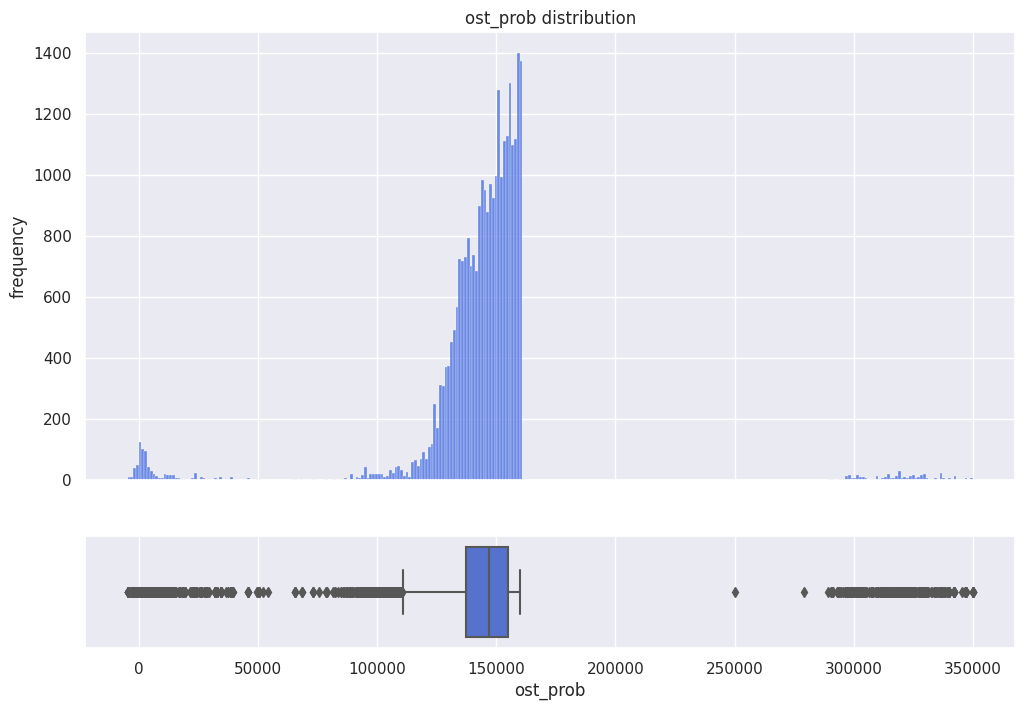

In [28]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_month_1['ost_prob'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_month_1['ost_prob'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='ost_prob')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='ost_prob distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


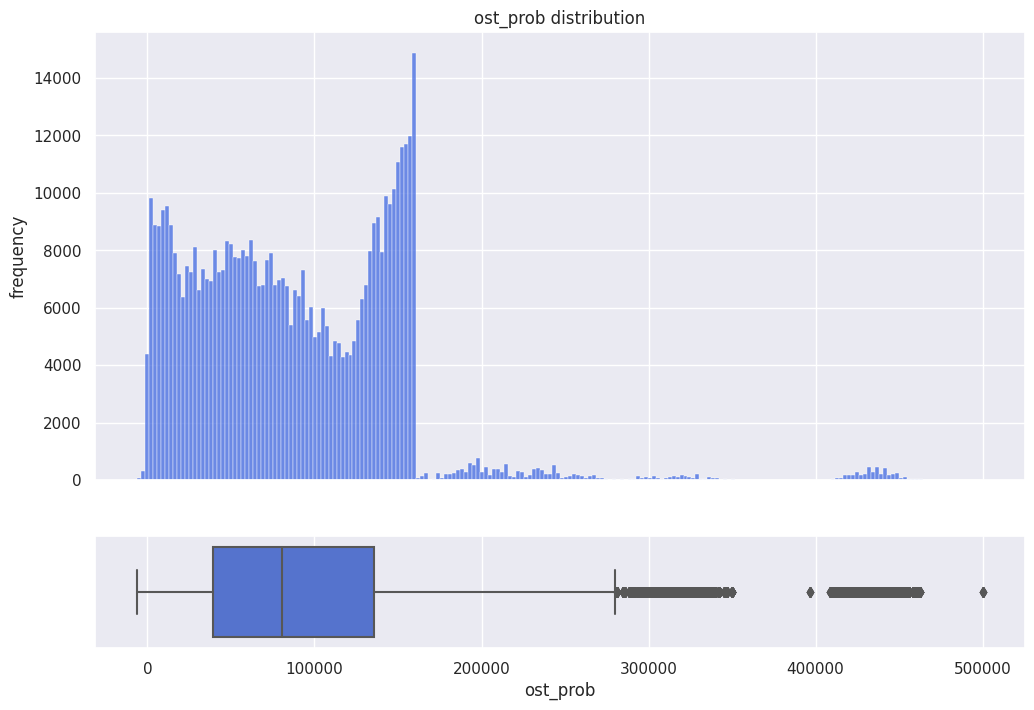

In [29]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_month_0['ost_prob'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_month_0['ost_prob'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='ost_prob')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='ost_prob distribution')
plt.show()

In [30]:
data_month_1['ost_prob'].describe()['mean'] / data['ost_prob'].describe()['mean'] * 100 - 100

58.63851592209559

Средний остаточный пробег вагонов, подлежащих к отправке превышает средний остаточный пробег всех вагонов на 58%, то есть в 1.5 раза

In [31]:
data_month_0['ost_prob'].describe()['mean'] / data['ost_prob'].describe()['mean'] * 100 - 100

-3.1170662321143965

Средний остаточный пробег вагонов, не подлежащих к отправке, почти не отличается от среднего остаточного пробега всех вагонов

### plrem_year

In [32]:
data_month_1['plrem_year'].describe()

count    28227.000000
mean      2022.906614
std          0.462428
min       2022.000000
25%       2023.000000
50%       2023.000000
75%       2023.000000
max       2025.000000
Name: plrem_year, dtype: float64

In [33]:
data_month_0['plrem_year'].describe()

count    540773.000000
mean       2023.561670
std           0.791916
min        2016.000000
25%        2023.000000
50%        2023.000000
75%        2024.000000
max        2026.000000
Name: plrem_year, dtype: float64

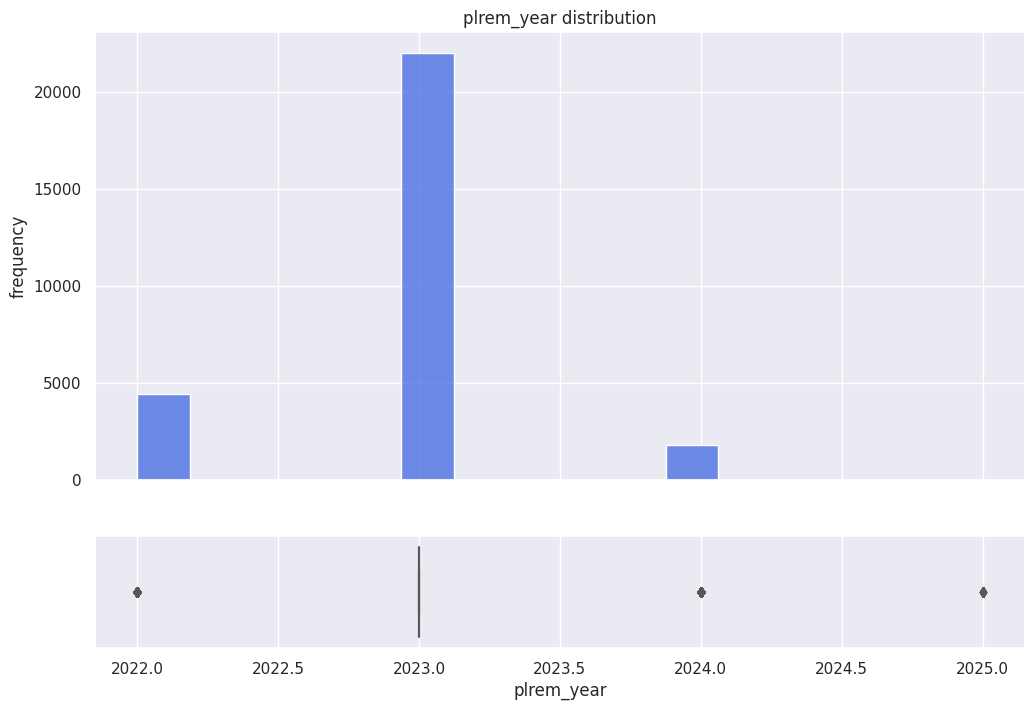

In [34]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_month_1['plrem_year'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_month_1['plrem_year'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='plrem_year')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='plrem_year distribution')
plt.show()

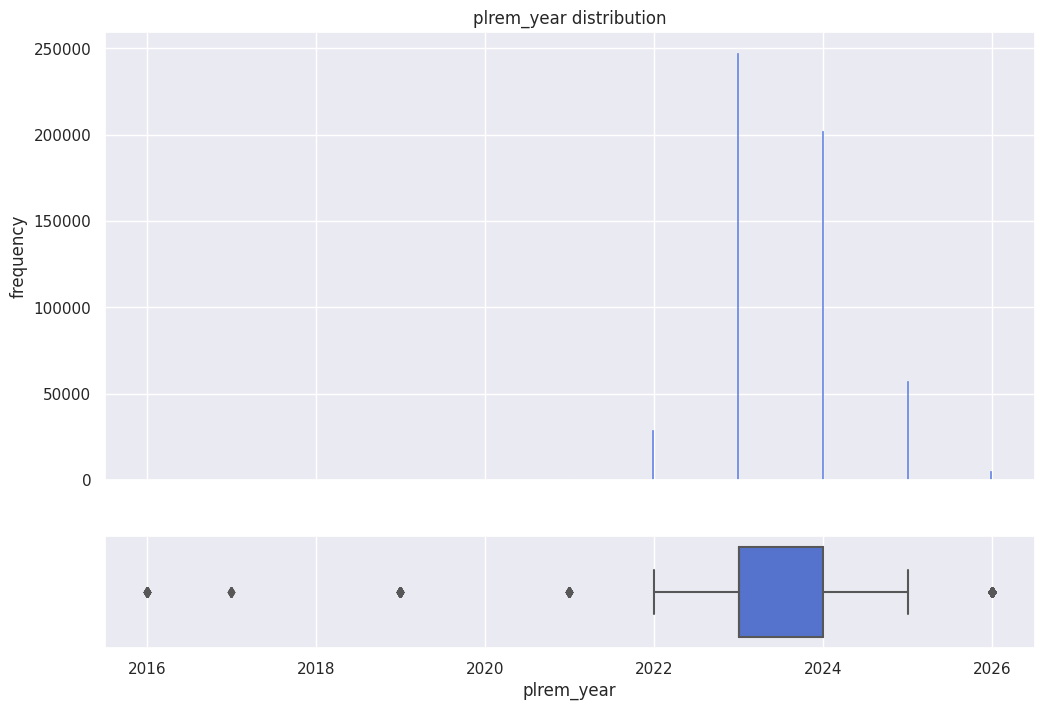

In [35]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_month_0['plrem_year'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_month_0['plrem_year'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='plrem_year')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='plrem_year distribution')
plt.show()

### rod_id

In [36]:
data_month_1['rod_id'].describe()

count     28227.0
mean     0.844015
std      0.362848
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: rod_id, dtype: Float64

In [37]:
data_month_0['rod_id'].describe()

count    540773.0
mean     0.696747
std      0.459664
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           1.0
Name: rod_id, dtype: Float64

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


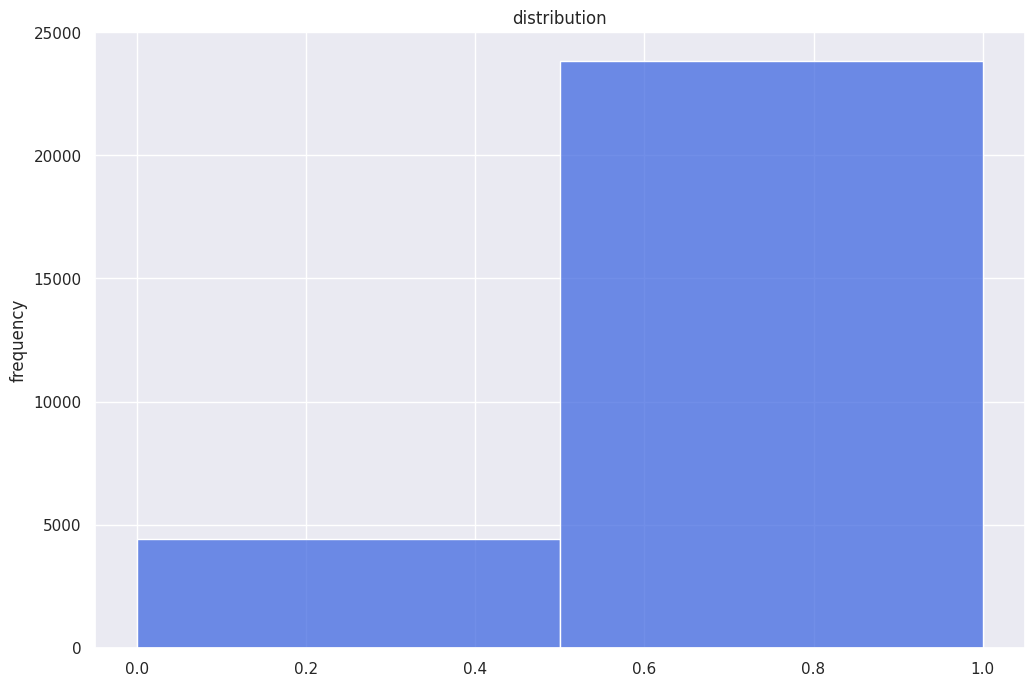

In [38]:
fig, ax_hist = plt.subplots(1, sharex=True, figsize=(12, 8))

sns.histplot(x=data_month_1['rod_id'], ax=ax_hist, color='royalblue', bins=2)

ax_hist.set(xlabel='')
ax_hist.set(ylabel='frequency')
ax_hist.set(title='distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


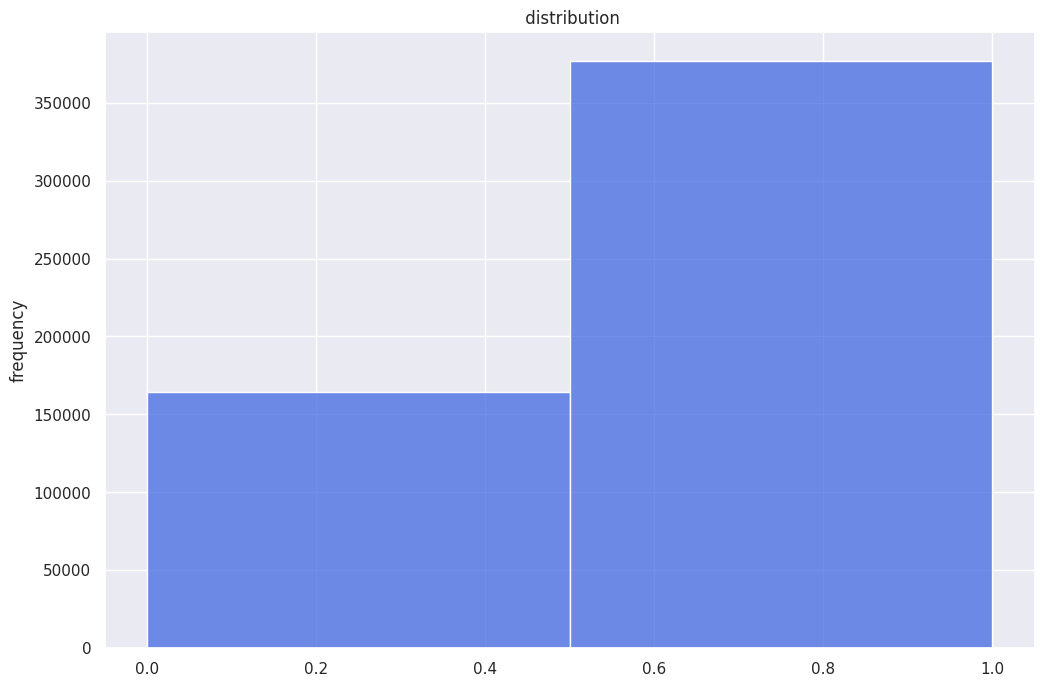

In [39]:
fig, ax_hist = plt.subplots(1, sharex=True, figsize=(12, 8))

sns.histplot(x=data_month_0['rod_id'], ax=ax_hist, color='royalblue', bins=2)

ax_hist.set(xlabel='')
ax_hist.set(ylabel='frequency')
ax_hist.set(title=' distribution')
plt.show()

In [40]:
data_month_1[data_month_1['rod_id'] == 0]['rod_id'].count() / data_month_1[data_month_1['rod_id'] == 1]['rod_id'].count() * 100

18.481363331094695

In [41]:
data_month_0[data_month_0['rod_id'] == 0]['rod_id'].count() / data_month_0[data_month_0['rod_id'] == 1]['rod_id'].count() * 100

43.524106777924636

Среди нуждающихся в ремонте вагонов тип РПС со значением 0 имеют только 18% вагонов, а среди остальных 43%. Следовательно, вагоны с типом РПС равным 0 отправляют в ремонт реже

### gr_probeg

In [42]:
data_month_1['gr_probeg'].describe()

count         19597.0
mean     82245.408277
std      35909.338215
min               7.0
25%           82455.0
50%           92988.0
75%          100098.0
max          308120.0
Name: gr_probeg, dtype: Float64

In [43]:
data_month_0['gr_probeg'].describe()

count        401668.0
mean     67446.427512
std      28225.670967
min               7.0
25%           47536.0
50%           71845.0
75%           89116.0
max          308120.0
Name: gr_probeg, dtype: Float64

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


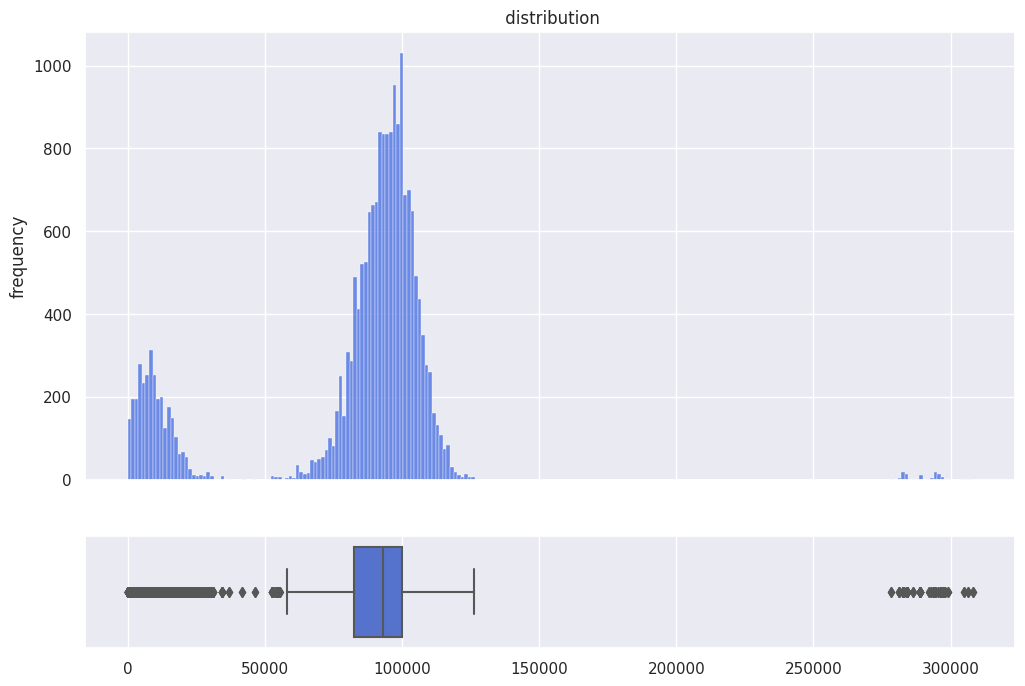

In [44]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_month_1['gr_probeg'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_month_1['gr_probeg'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='')
ax_hist.set(ylabel='frequency')
ax_hist.set(title=' distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


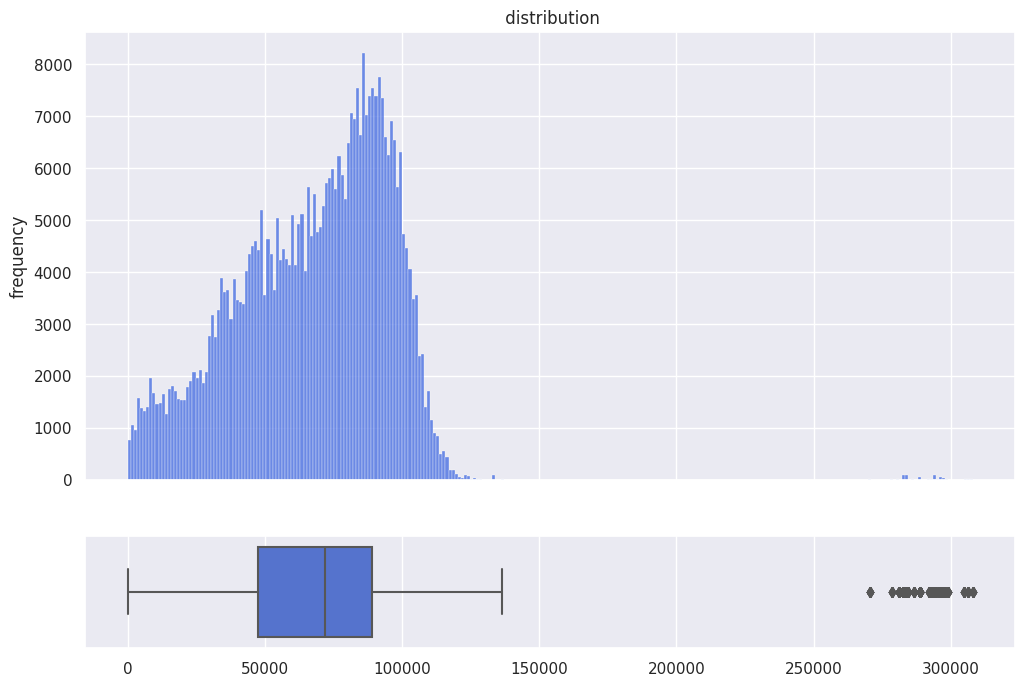

In [45]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.8, .2)}, figsize=(12, 8))

sns.histplot(x=data_month_0['gr_probeg'], ax=ax_hist, color='royalblue')
sns.boxplot(x=data_month_0['gr_probeg'], ax=ax_box, color='royalblue')

ax_box.set(xlabel='')
ax_hist.set(ylabel='frequency')
ax_hist.set(title=' distribution')
plt.show()

Наиболее часто нуждаются в ремонте те вагоны, у которых пробег в груженном состоянии еще не достиг 20000 км, или же превысил 75000 км

### ownertype

In [46]:
data_month_1['ownertype'].describe()

count     28227.0
mean     0.109789
std      0.312631
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ownertype, dtype: Float64

In [47]:
data_month_0['ownertype'].describe()

count    540773.0
mean     0.076328
std      0.265522
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ownertype, dtype: Float64

In [48]:
data_month_1['ownertype'].value_counts().iloc[1] / data_month_1['ownertype'].value_counts().iloc[0] * 100

12.332855778414517

In [49]:
data_month_0['ownertype'].value_counts().iloc[1] / data_month_0['ownertype'].value_counts().iloc[0] * 100

8.263513094172739

Переданные в аренду вагоны приходят в неисправность на 50% чаще

### model

In [50]:
data_month_1['model'].describe()

count      28227
unique        39
top       12-132
freq       12355
Name: model, dtype: object

In [51]:
data_month_0['model'].describe()

count     540773
unique        49
top       12-132
freq      210099
Name: model, dtype: object

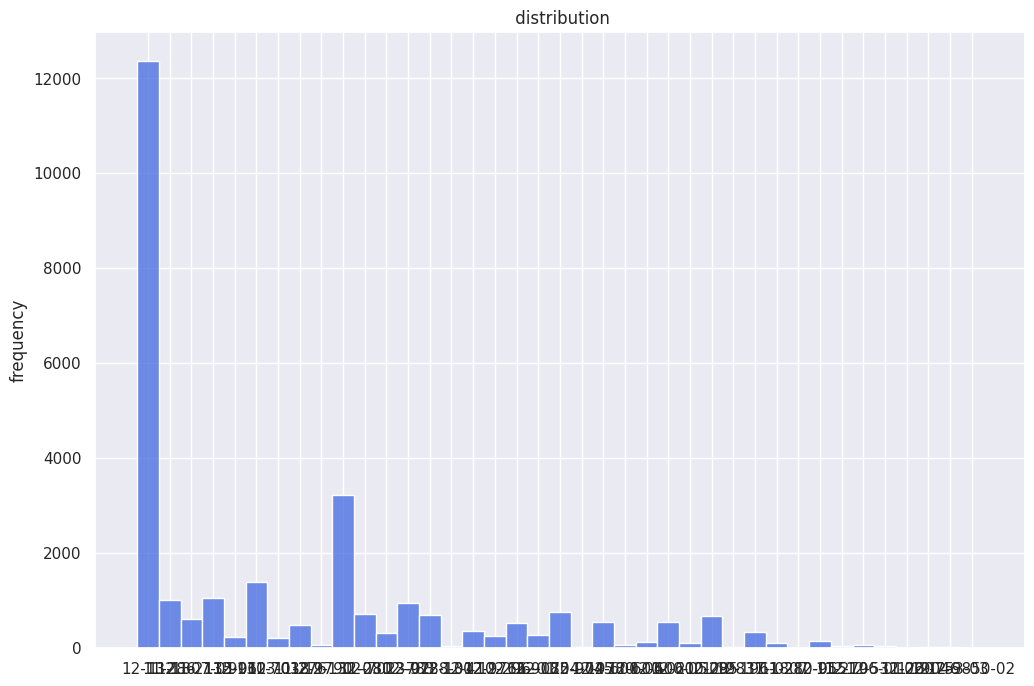

In [52]:
fig, ax_hist = plt.subplots(1, sharex=True, figsize=(12, 8))

sns.histplot(x=data_month_1['model'], ax=ax_hist, color='royalblue')

ax_hist.set(xlabel='')
ax_hist.set(ylabel='frequency')
ax_hist.set(title=' distribution')
plt.show()

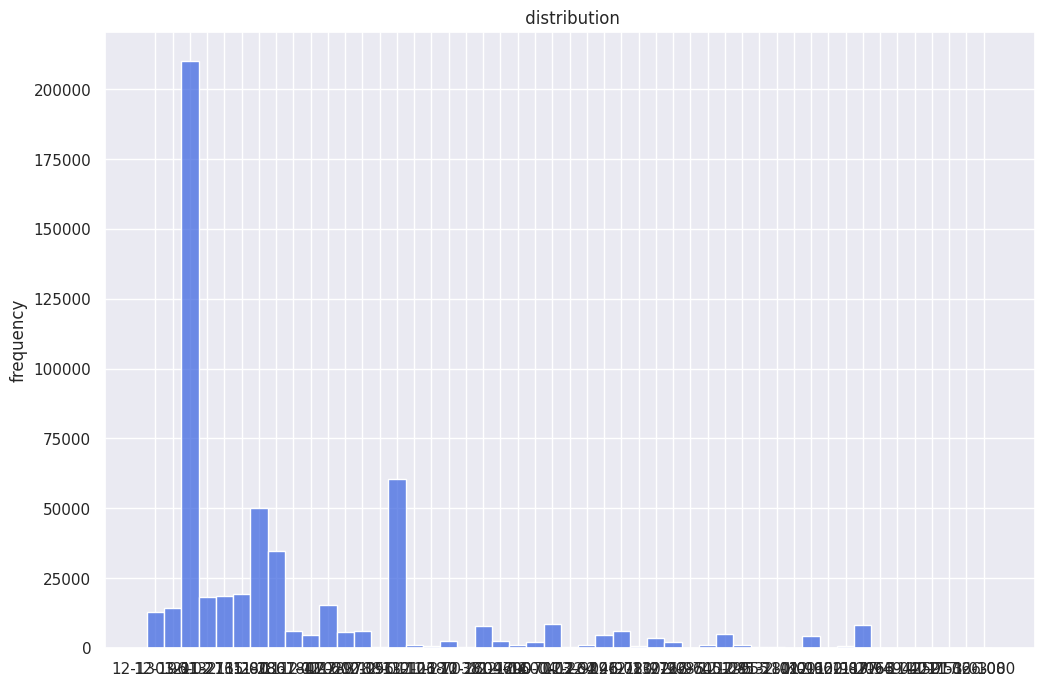

In [53]:
fig, ax_hist = plt.subplots(1, sharex=True, figsize=(12, 8))

sns.histplot(x=data_month_0['model'], ax=ax_hist, color='royalblue')

ax_hist.set(xlabel='')
ax_hist.set(ylabel='frequency')
ax_hist.set(title=' distribution')
plt.show()

In [54]:
models = pd.DataFrame(data={"data_1": data_month_1['model'].value_counts(), "data_0": data_month_0['model'].value_counts()})
models = models.dropna()

In [55]:
models['slom_rate'] = models['data_1'] / models['data_0']

In [56]:
models[models['data_1'] + models['data_0'] > 5000].sort_values(by='slom_rate', ascending=False)[:7]

,data_1,data_0,slom_rate
12-295,674,4858,0.13874
12-296-01,528,4680,0.112821
12-9788-01,684,6132,0.111546
12-1303-01,1387,12647,0.10967
12-600-05,552,5550,0.099459
12-1704-04,762,7794,0.097768
12-9780,542,5986,0.090545


Каждый десятый вагон вышепредставленых моделей отправлялся в ремонт, когда у остальных широкоиспользоуемых моделей отправлялся в ремонт примерно каждый двадцатый

### zavod_build

In [57]:
data_month_1['zavod_build'].describe()

count     28227.0
mean     3.005775
std      5.294147
min           0.0
25%           0.0
50%           0.0
75%           4.0
max          21.0
Name: zavod_build, dtype: Float64

In [58]:
data_month_0['zavod_build'].describe()

count    540773.0
mean      2.93397
std      5.473507
min           0.0
25%           0.0
50%           0.0
75%           2.0
max          23.0
Name: zavod_build, dtype: Float64

In [59]:
data_month_1['zavod_build'].value_counts()

0     14974
1      4470
6      2118
2      1479
13      849
17      830
4       542
15      433
5       408
8       350
19      281
11      251
21      245
20      232
9       191
16      173
3       141
12       91
10       87
18       61
7        13
14        8
Name: zavod_build, dtype: Int64

In [60]:
zavods = pd.DataFrame(data={"data_1": data_month_1['zavod_build'].value_counts(), "data_0": data_month_0['zavod_build'].value_counts()})
zavods = zavods.dropna()

In [61]:
zavods['slom_rate'] = zavods['data_1'] / zavods['data_0']

In [62]:
zavods[zavods['data_1'] + zavods['data_0'] > 1000].sort_values(by='slom_rate', ascending=False)[:3]

,data_1,data_0,slom_rate
16,173,1147,0.150828
19,281,2156,0.130334
6,2118,19290,0.109798


Доля вагонов, которые отправляются в ремонт с заводов с представленными номерами превышает 10%

###**ВЫВОД**

**Исходя из результатов исследовательского анализа данных опишем портрет типичного поезда, подлежащего отправке в ремонт.**

**Остаточный пробег такого поезда сверхмалый - не превышает 5 тыс. км, либо же, наоборот, сверхвысокий - от 100 до 150 тыс. км.**

**Пробег в груженном состоянии составляет либо менее 25 тыс. км, либо от 75 тыс. км и более.**

**Вагоны, переданные в аренду, приходят в неисправность в 1.5 раза чаще**

**Вагоны с типом РПС, имеющим значение 0, в 2.3 раза реже отправляются в ремонт, нежели со значением типа РПС, равным 1.**

**У 10% или более вагонов моделей "12-295", "12-296-01", "12-9788-01", "12-1301-01", "12-600-05", "12-1704-04" и "12-9780" найдены неисправности, в то время как у остальных моделей обнаружены неисправности около у 5% вагонов.**

**Заводы 16, 19 и 6 выпускают наивысший среди всех процент вагонов, отправленных в ремонт - 15%, 13% и 11% соответственно.**